In [1]:
import numpy as np
from matplotlib import pyplot as plt

Функция генерации точек по функции прямой с добавлением шума

In [2]:
def linear_data_gen(k: float, b: float, points_num: int, percent: float):
    inliners_points = [[x, k * x + b + np.random.normal()] for x in np.random.uniform(0, 10, size=int(points_num * percent))]
    outliners_points = [[x, k * x + b + np.random.normal(scale=10.0)] for x in np.random.uniform(0, 10, size=int(points_num * (1 - percent)))]
    return np.concatenate((inliners_points, outliners_points))

Вывод сгенерированных точек на графике

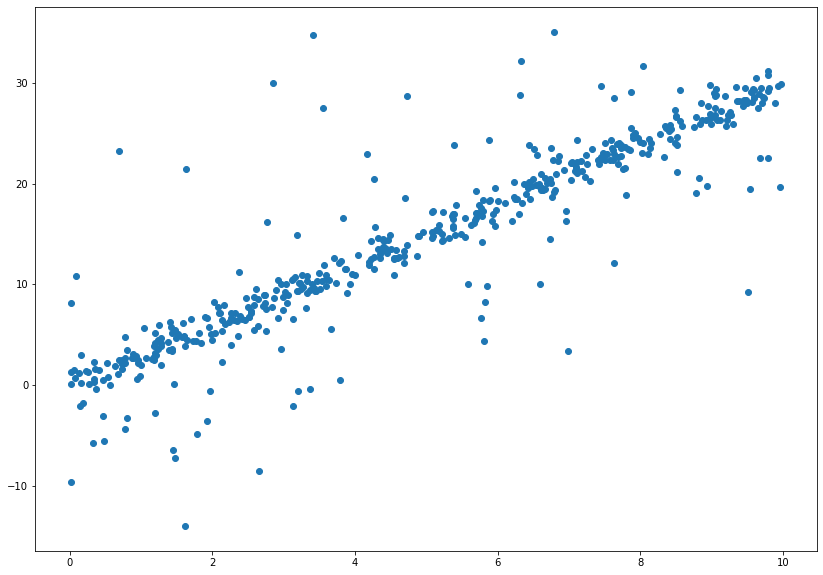

In [3]:
data = linear_data_gen(3, 0, 500, 0.8)
points_mean = np.mean(data, axis=0)

plt.figure(figsize=(14, 10))
plt.scatter(data[:, 0], data[:, 1])

Функция, реализуящая метод RANSAC для линейной функции `y = k + b*x`

In [4]:
def linear_ransac(data, iter_number=100, eps=0.05, min_inliners=10):
  # выполнение итераций указанное количество раз
  for i in range(iter_number):
    best_score = float('inf')
    # выбираем индексы 2-х точек из массива
    indexes = np.random.choice(data.shape[0], 2, replace=False)
    
    # получаем координаты выбранных точек
    p1, p2 = data[indexes, :]
    
    # получаем коэффициенты прямой
    k = (p2[1]-p1[1]) / (p2[0]-p1[0])
    b = p1[1] - p1[0]*k
    
    # вбросы и ошибка
    inliners = []
    error = 0
    
    # проходимся по индексам остальных точек
    for pi in range(len(data)):
        # если индекс точки совпадает с индексом уже выбранных точек переходим к следующей итерации
        if pi in indexes:
            continue
        
        # вычисляем отлонение точки от прямой, составленной из 2-х выбранных точек
        d = np.linalg.norm(np.cross(p2-p1, data[pi]))/np.linalg.norm(p2-p1)
        
        # если отклонение меньше указанной точности
        if d < eps:
            # добавляем вбросы и увеличиваем суммарную ошибку
            inliners.append(data[pi])
            error += d
            
    # если количество вбросов меньше порога, то переходим к следующей итерации
    if len(inliners) < min_inliners:
        continue
        
    # если суммарная ошибка меньше лучшего значения - обновляем данные
    if error < best_score:
        best_score = error
        best_params = k, b
        best_points = p1, p2
      
  return best_params, best_points

Применение функции RANSAC для линейной функции

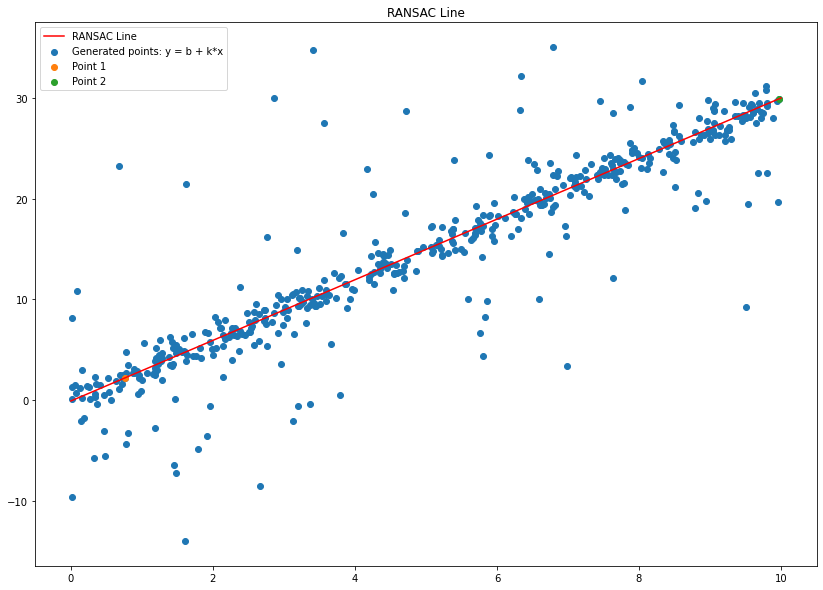

In [5]:
(k, b), (x1, x2) = linear_ransac(data=data, iter_number=100, eps=0.05, min_inliners=50)
points_mean = np.mean(data, axis=0)

plt.figure(figsize=(14, 10))
plt.scatter(data[:, 0], data[:, 1], label='Generated points: y = b + k*x')
plt.scatter(x1[0], x1[1], label='Point 1')
plt.scatter(x2[0], x2[1], label='Point 2')
plt.plot([0, 10], [x*k + b for x in [0, 10]], label='RANSAC Line', color='red')
plt.legend()
plt.title('RANSAC Line')
plt.savefig('RANSAC Line.png')